# Optimizing Airline Profitability: A Data Analytics Approach Using SQLite and Python


# Objective:
The objective of this project is to leverage SQLite and Python for a comprehensive data analytics solution aimed at addressing the challenges faced by a leading air transportation company. By analyzing the company’s database, the project seeks to enhance aircraft occupancy rates and strategically increase profitability per seat. This initiative focuses on mitigating the impact of critical industry challenges such as stricter environmental regulations, which elevate operating costs and limit expansion opportunities, and higher flight taxes, which increase the cost of flying and suppress demand. Additionally, the project aims to provide insights to address the tight labor market and rising labor costs caused by a scarcity of skilled workers and high turnover rates. Ultimately, the solution will enable the company to make informed decisions that drive sustainability, improve operational efficiency, and ensure long-term growth.

In [1]:
# Importing Libraries we need
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
import json

import warnings
warnings.filterwarnings('ignore')


# Connection to the airlines SQLite Database

In [2]:
connection = sqlite3.connect('airlines.sqlite')
cursor = connection.cursor()

In [3]:
#checking all the tables present in the database
tables = pd.read_sql("""SELECT name
                        FROM sqlite_master
                        WHERE type='table';""", connection)
tables


,name
0,aircrafts_data
1,airports_data
2,boarding_passes
3,bookings
4,flights
5,seats
6,ticket_flights
7,tickets


# Exploratory Data Analysis (EDA)

In [4]:
#checking airports_data
airports_data = pd.read_sql_query("select * from airports_data",connection)
airports_data

,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}","(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-К...","(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хом...","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""Южно-Сахали...","(142.718002319335938,46.8886985778808594)",Asia/Sakhalin
...,...,...,...,...,...
99,MMK,"{""en"": ""Murmansk Airport"", ""ru"": ""Мурманск""}","{""en"": ""Murmansk"", ""ru"": ""Мурманск""}","(32.7508010864257812,68.7817001342773438)",Europe/Moscow
100,ABA,"{""en"": ""Abakan Airport"", ""ru"": ""Абакан""}","{""en"": ""Abakan"", ""ru"": ""Абакан""}","(91.3850021362304688,53.7400016784667969)",Asia/Krasnoyarsk
101,BAX,"{""en"": ""Barnaul Airport"", ""ru"": ""Барнаул""}","{""en"": ""Barnaul"", ""ru"": ""Барнаул""}","(83.5384979248046875,53.363800048828125)",Asia/Krasnoyarsk
102,AAQ,"{""en"": ""Anapa Vityazevo Airport"", ""ru"": ""Витяз...","{""en"": ""Anapa"", ""ru"": ""Анапа""}","(37.3473014831539984,45.002101898192997)",Europe/Moscow


In [5]:
#checking aircrafts_data
aircrafts_data = pd.read_sql_query("select * from aircrafts_data", connection)
aircrafts_data 

,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600
5,319,"{""en"": ""Airbus A319-100"", ""ru"": ""Аэробус A319-...",6700
6,733,"{""en"": ""Boeing 737-300"", ""ru"": ""Боинг 737-300""}",4200
7,CN1,"{""en"": ""Cessna 208 Caravan"", ""ru"": ""Сессна 208...",1200
8,CR2,"{""en"": ""Bombardier CRJ-200"", ""ru"": ""Бомбардье ...",2700


In [6]:
#checking boarding_passes
boarding_passes = pd.read_sql_query("select * from boarding_passes",connection)
boarding_passes

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A
...,...,...,...,...
579681,0005434302871,19945,85,20F
579682,0005432892791,19945,86,21C
579683,0005434302869,19945,87,20E
579684,0005432802476,19945,88,21F


In [7]:
#checking bookings
bookings = pd.read_sql_query("select * from bookings",connection)
bookings

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600
...,...,...,...
262783,FFFEF3,2017-07-17 07:23:00+03,56000
262784,FFFF2C,2017-08-08 05:55:00+03,10800
262785,FFFF43,2017-07-20 20:42:00+03,78500
262786,FFFFA8,2017-08-08 04:45:00+03,28800


In [8]:
#checking flights
flights = pd.read_sql_query("select * from flights",connection)
flights

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N
...,...,...,...,...,...,...,...,...,...,...
33116,33117,PG0063,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03
33117,33118,PG0063,2017-07-28 19:25:00+03,2017-07-28 20:10:00+03,SKX,SVO,Arrived,CR2,2017-07-28 19:30:00+03,2017-07-28 20:15:00+03
33118,33119,PG0063,2017-09-08 19:25:00+03,2017-09-08 20:10:00+03,SKX,SVO,Scheduled,CR2,\N,\N
33119,33120,PG0063,2017-08-01 19:25:00+03,2017-08-01 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-01 19:26:00+03,2017-08-01 20:12:00+03


In [9]:
#checking seats
seats = pd.read_sql_query("select * from seats",connection)
seats

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business
...,...,...,...
1334,773,48H,Economy
1335,773,48K,Economy
1336,773,49A,Economy
1337,773,49C,Economy


In [10]:
#checking ticket_flights
ticket_flights = pd.read_sql_query("select * from ticket_flights", connection)
ticket_flights

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100
...,...,...,...,...
1045721,0005435097522,32094,Economy,5200
1045722,0005435097521,32094,Economy,5200
1045723,0005435104384,32094,Economy,5200
1045724,0005435104352,32094,Economy,5200


In [11]:
# checking tickets
tickets = pd.read_sql_query("select * from tickets",connection)
tickets

,ticket_no,book_ref,passenger_id
0,0005432000987,06B046,8149 604011
1,0005432000988,06B046,8499 420203
2,0005432000989,E170C3,1011 752484
3,0005432000990,E170C3,4849 400049
4,0005432000991,F313DD,6615 976589
...,...,...,...
366728,0005435999869,D730BA,0474 690760
366729,0005435999870,D730BA,6535 751108
366730,0005435999871,A1AD46,1596 156448
366731,0005435999872,7B6A53,9374 822707


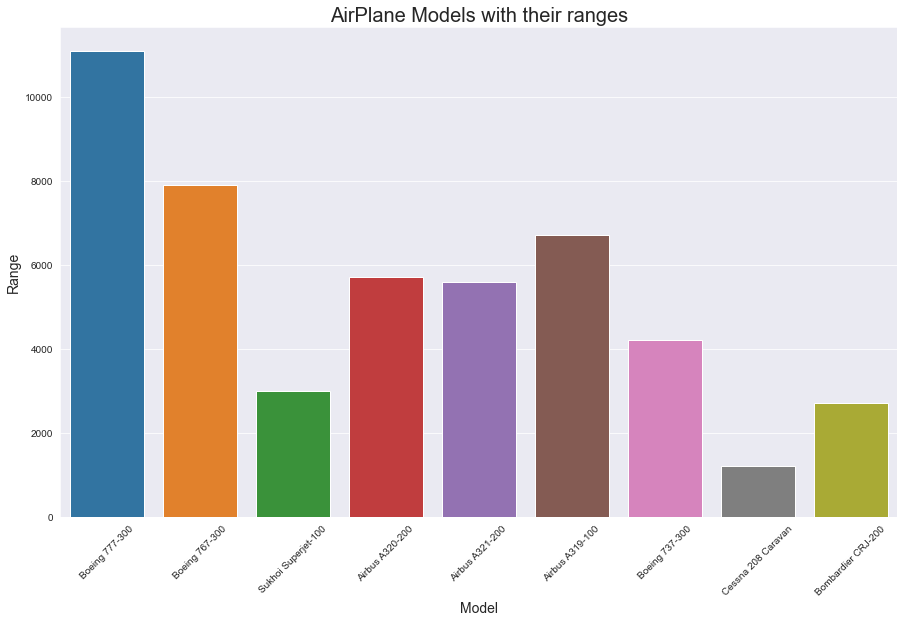

In [12]:
# Extracting english names of the aircraft models
def extract_english_name(x):
    return json.loads(x)['en']
aircrafts_data['model'] = aircrafts_data['model'].apply(extract_english_name)

# poltting Aircraft models with their ranges
sns.set_style('darkgrid')
plt.subplots(figsize=(15,9))
sns.barplot(x='model',y='range', data=aircrafts_data)
plt.title('AirPlane Models with their ranges',fontsize=20)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Range', fontsize=14)
plt.xticks(rotation=45)
plt.show()

How many aircraft have seating capacities more than 100?

In [13]:
df = pd.read_sql_query("""select aircraft_code, count(*) as num_seats from seats
                        group by aircraft_code having num_seats >100""", connection)
df


,aircraft_code,num_seats
0,319,116
1,320,140
2,321,170
3,733,130
4,763,222
5,773,402


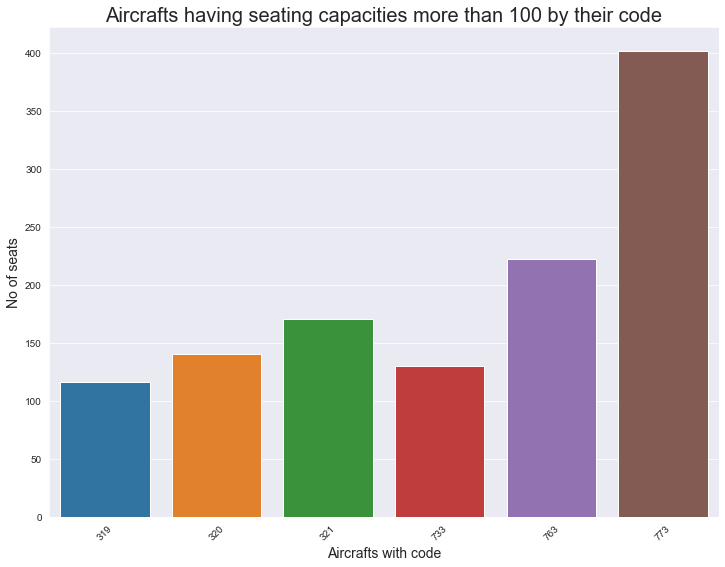

In [14]:
sns.set_style('darkgrid')
plt.figure(figsize = (12,9))
sns.barplot(x = 'aircraft_code', y = 'num_seats', data = df)
plt.title('Aircrafts having seating capacities more than 100 by their code',fontsize=20)
plt.xlabel('Aircrafts with code', fontsize=14)
plt.ylabel('No of seats', fontsize=14)
plt.xticks(rotation = 45)
plt.show()

What changes are observed in the number of tickets sold and the revenue generated over time?

In [15]:
tickets = pd.read_sql_query("""select ticket_no, SUBSTR(book_date,1,10) AS date, total_amount from tickets inner join bookings
                    on tickets.book_ref = bookings.book_ref
                    group by date
                    order by date""", connection)

tickets

,ticket_no,date,total_amount
0,0005432628587,2017-06-21,52000
1,0005432984533,2017-06-22,123000
2,0005432150056,2017-06-23,64700
3,0005432056234,2017-06-24,13000
4,0005432034471,2017-06-25,6000
5,0005432045579,2017-06-26,14900
6,0005432002041,2017-06-27,17600
7,0005432003645,2017-06-28,99800
8,0005432000989,2017-06-29,24700
9,0005432000999,2017-06-30,6200


In [16]:
tickets2 = pd.read_sql_query("""select SUBSTR(book_date,1,10) AS date, COUNT(ticket_no) AS tickets, total_amount AS ticket_amount, sum(total_amount) AS amount_sum from tickets inner join bookings
                    on tickets.book_ref = bookings.book_ref
                    group by date
                    order by date""", connection)

tickets2

,date,tickets,ticket_amount,amount_sum
0,2017-06-21,6,52000,916100
1,2017-06-22,12,123000,1536300
2,2017-06-23,28,64700,3114800
3,2017-06-24,106,13000,10279900
4,2017-06-25,266,6000,24652200
5,2017-06-26,499,14900,48710400
6,2017-06-27,1028,17600,88733500
7,2017-06-28,1678,99800,147624200
8,2017-06-29,2765,24700,248677900
9,2017-06-30,3772,6200,337783200


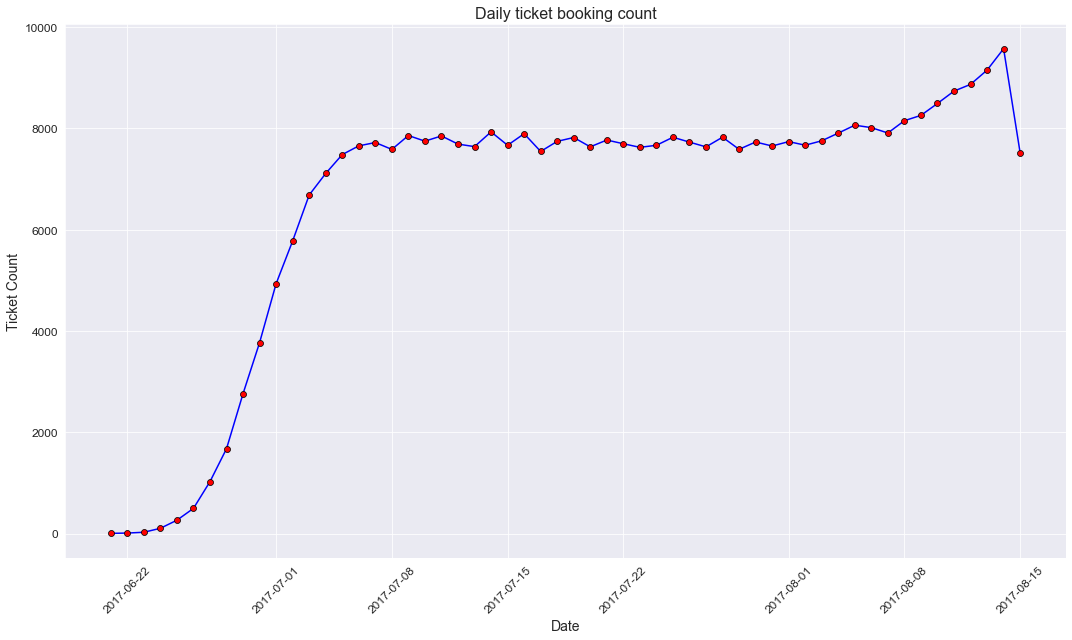

In [17]:

# Ensure the date column is in datetime format
tickets2['date'] = pd.to_datetime(tickets2['date'])

# Plotting daily ticket booking counts
plt.figure(figsize=(15, 9))
sns.lineplot(
    x='date', 
    y='tickets', 
    data=tickets2, 
    marker='o', 
    color='blue', 
    markerfacecolor='red', 
    markeredgecolor='black'
    )
plt.title('Daily ticket booking count', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Ticket Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

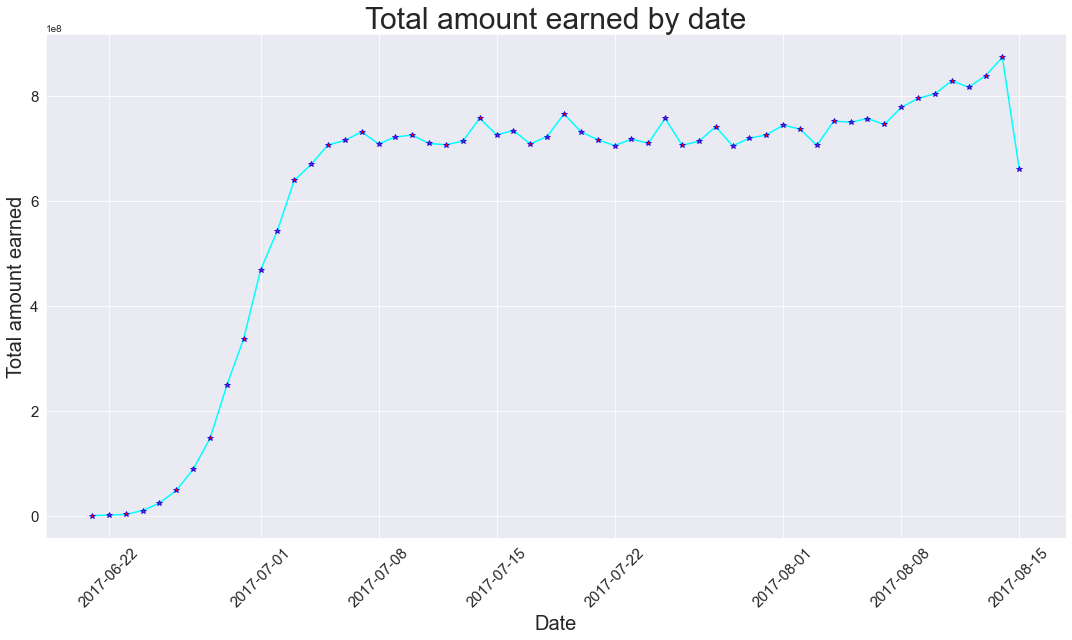

In [18]:
# Plotting the total amount earned by date
plt.figure(figsize=(15, 9))
sns.lineplot(x='date', y='amount_sum', data=tickets2, color='cyan', marker='*', markeredgecolor='blue',markerfacecolor='red')
plt.title('Total amount earned by date', fontsize=30)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Total amount earned', fontsize=20)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.show()

Overview of the Average Expenses Linked to Various Fare Conditions for Each Aircraft.

In [19]:
df2 = pd.read_sql_query("""select fare_conditions as class, aircraft_code,avg(amount) as avg_amount 
                        from ticket_flights join flights 
                        on ticket_flights.flight_id = flights.flight_id
                        group by aircraft_code, fare_conditions""", connection)
df2



,class,aircraft_code,avg_amount
0,Business,319,113550.557703
1,Economy,319,38311.402347
2,Business,321,34435.662664
3,Economy,321,11534.974764
4,Business,733,41865.626175
5,Economy,733,13985.152000
6,Business,763,82839.842866
7,Economy,763,27594.721829
8,Business,773,57779.909435
9,Comfort,773,32740.552889


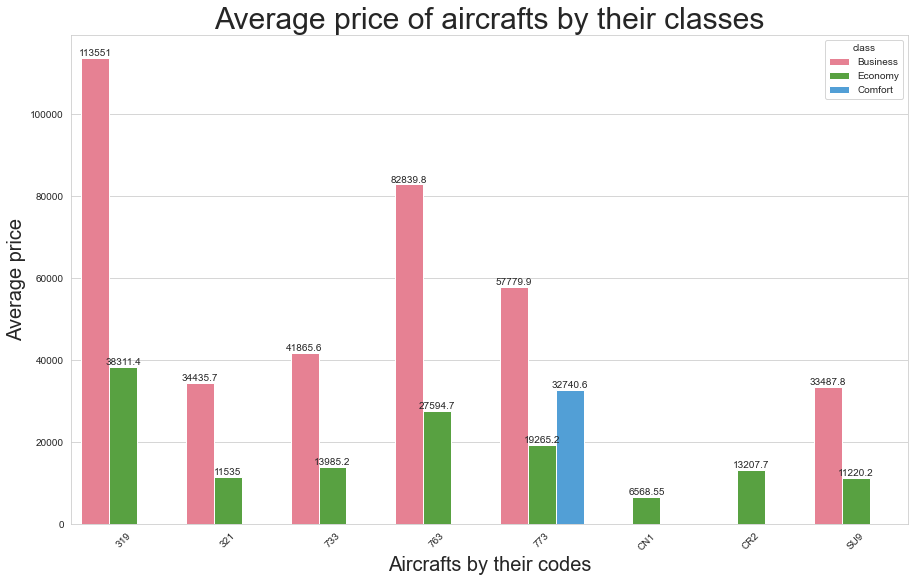

In [20]:
sns.set_style('whitegrid')
plt.figure(figsize = (15,9))
fig=sns.barplot(x = 'aircraft_code', y = 'avg_amount', hue = 'class', data = df2, palette = 'husl')
plt.title('Average price of aircrafts by their classes',fontsize=30)
for container in fig.containers:
    fig.bar_label(container)
plt.xlabel('Aircrafts by their codes', fontsize=20)
plt.ylabel('Average price', fontsize=20)
plt.xticks(rotation = 45)
plt.show()

How much total revenue and average revenue per ticket does each aircraft generate?

In [21]:
revenue = pd.read_sql_query("""
    SELECT aircraft_code, ticket_count, total_revenue, 
           total_revenue/ticket_count AS avg_revenue_per_ticket 
    FROM (
        SELECT aircraft_code, COUNT(*) AS ticket_count, 
               SUM(amount) AS total_revenue 
        FROM ticket_flights
        JOIN flights ON ticket_flights.flight_id = flights.flight_id
        GROUP BY aircraft_code
    )
""", connection)
revenue

,aircraft_code,ticket_count,total_revenue,avg_revenue_per_ticket
0,319,52853,2706163100,51201
1,321,107129,1638164100,15291
2,733,86102,1426552100,16568
3,763,124774,4371277100,35033
4,773,144376,3431205500,23765
5,CN1,14672,96373800,6568
6,CR2,150122,1982760500,13207
7,SU9,365698,5114484700,13985


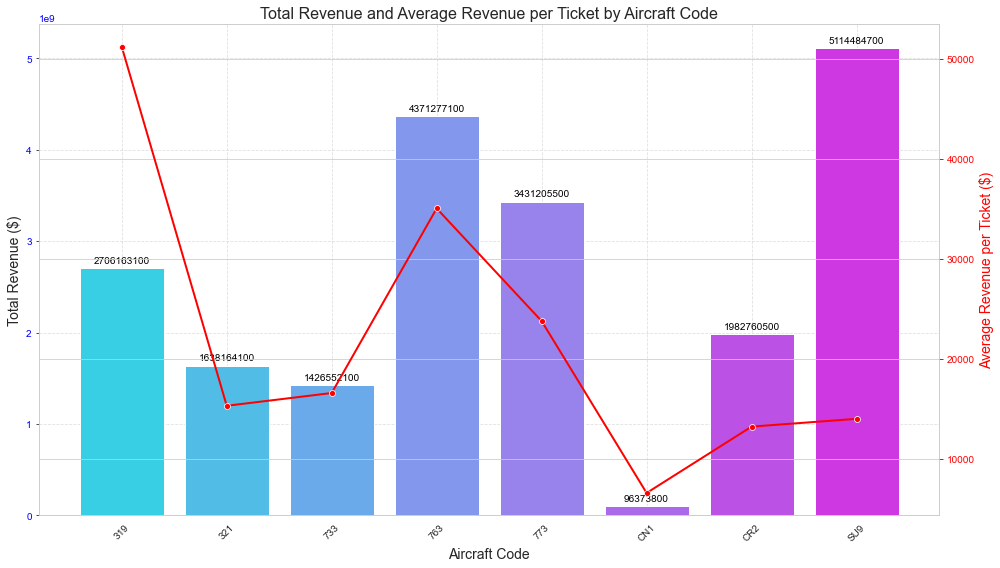

In [22]:
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot the Total Revenue as bars
barplot = sns.barplot(
    x='aircraft_code',
    y='total_revenue',
    data=revenue,
    palette='cool',
    ax=ax1
)
ax1.set_title('Total Revenue and Average Revenue per Ticket by Aircraft Code', fontsize=16)
ax1.set_xlabel('Aircraft Code', fontsize=14)
ax1.set_ylabel('Total Revenue ($)', fontsize=14)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True, linestyle='--', alpha=0.6)

# Add labels on top of bars
for container in barplot.containers:
    barplot.bar_label(container, fmt='%.0f', padding=3, fontsize=10, color='black')

# Rotate x-axis labels for barplot
for label in ax1.get_xticklabels():
    label.set_rotation(45)

# Create a second y-axis for Average Revenue per Ticket
ax2 = ax1.twinx()
sns.lineplot(
    x='aircraft_code',
    y='avg_revenue_per_ticket',
    data=revenue,
    color='red',
    marker='o',
    linewidth=2,
    ax=ax2
)
ax2.set_ylabel('Average Revenue per Ticket ($)', fontsize=14, color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Adjust layout
plt.tight_layout()
plt.show()


What is the occupancy rate for each aircraft?|

In [23]:
# Get the number of seats booked per aircraft
booked_seats = pd.read_sql_query("""
    SELECT aircraft_code, COUNT(*) AS seats_count
    FROM boarding_passes
    INNER JOIN flights ON boarding_passes.flight_id = flights.flight_id
    GROUP BY aircraft_code, flights.flight_id
""", connection)

# Get the total number of seats available per aircraft
total_seats = pd.read_sql_query("""
    SELECT aircraft_code, COUNT(*) AS num_seats
    FROM seats
    GROUP BY aircraft_code
""", connection)

# Merge the two DataFrames based on 'aircraft_code'
merged_data = pd.merge(booked_seats, total_seats, on='aircraft_code', how='inner')

# Calculate the average booked seats and the occupancy rate
# Group by aircraft_code and compute the average booked seats and occupancy rate
occupancy_rate = merged_data.groupby('aircraft_code').agg(
    booked_seats=('seats_count', 'mean'),
    num_seats=('num_seats', 'first')
)
occupancy_rate['occupancy_rate'] = occupancy_rate['booked_seats'] / occupancy_rate['num_seats']

# Display the resulting DataFrame
occupancy_rate.reset_index(inplace=True)
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate
0,319,53.583181,116,0.461924
1,321,88.809231,170,0.522407
2,733,80.255462,130,0.617350
3,763,113.937294,222,0.513231
4,773,264.925806,402,0.659019
5,CN1,6.004431,12,0.500369
6,CR2,21.482847,50,0.429657
7,SU9,56.812113,97,0.585692


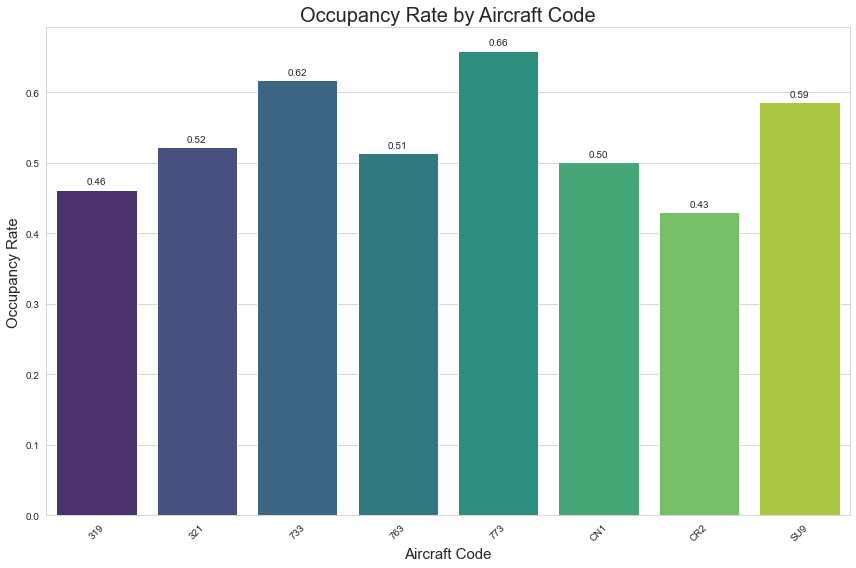

In [24]:
plt.figure(figsize=(12, 8))

# Plotting occupancy rate using seaborn
ax = sns.barplot(x='aircraft_code', y='occupancy_rate', data=occupancy_rate, palette='viridis')

# Adding titles and labels
plt.title('Occupancy Rate by Aircraft Code', fontsize=20)
plt.xlabel('Aircraft Code', fontsize=15)
plt.ylabel('Occupancy Rate', fontsize=15)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)

# Show the plot
plt.tight_layout()
plt.show()

What would be the increase in total annual revenue if the occupancy rate of all aircraft were to rise by 10%?

In [25]:
occupancy_rate['New occupancy_rate'] = occupancy_rate['occupancy_rate']*1.10
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate,New occupancy_rate
0,319,53.583181,116,0.461924,0.508116
1,321,88.809231,170,0.522407,0.574648
2,733,80.255462,130,0.617350,0.679085
3,763,113.937294,222,0.513231,0.564554
4,773,264.925806,402,0.659019,0.724921
5,CN1,6.004431,12,0.500369,0.550406
6,CR2,21.482847,50,0.429657,0.472623
7,SU9,56.812113,97,0.585692,0.644261


In [26]:
total_revenue = pd.read_sql_query("""select aircraft_code, sum(amount) as total_revenue from ticket_flights
                                     join flights on ticket_flights.flight_id = flights.flight_id
                                     group by aircraft_code""", connection)

# Merge the total revenue DataFrame with the occupancy rate DataFrame on 'aircraft_code'
merged_data = occupancy_rate.merge(total_revenue, on='aircraft_code', how='left')

# Calculate the 'New Total Annual Turnover'
merged_data['New Total Annual Turnover'] = (merged_data['total_revenue'] / merged_data['occupancy_rate']) * merged_data['New occupancy_rate']

# Round the resulting values for better presentation
merged_data['New Total Annual Turnover'] = merged_data['New Total Annual Turnover'].round(2)

# Display the final DataFrame with the new calculated column
merged_data

,aircraft_code,booked_seats,num_seats,occupancy_rate,New occupancy_rate,total_revenue,New Total Annual Turnover
0,319,53.583181,116,0.461924,0.508116,2706163100,2.976779e+09
1,321,88.809231,170,0.522407,0.574648,1638164100,1.801981e+09
2,733,80.255462,130,0.617350,0.679085,1426552100,1.569207e+09
3,763,113.937294,222,0.513231,0.564554,4371277100,4.808405e+09
4,773,264.925806,402,0.659019,0.724921,3431205500,3.774326e+09
5,CN1,6.004431,12,0.500369,0.550406,96373800,1.060112e+08
6,CR2,21.482847,50,0.429657,0.472623,1982760500,2.181037e+09
7,SU9,56.812113,97,0.585692,0.644261,5114484700,5.625933e+09


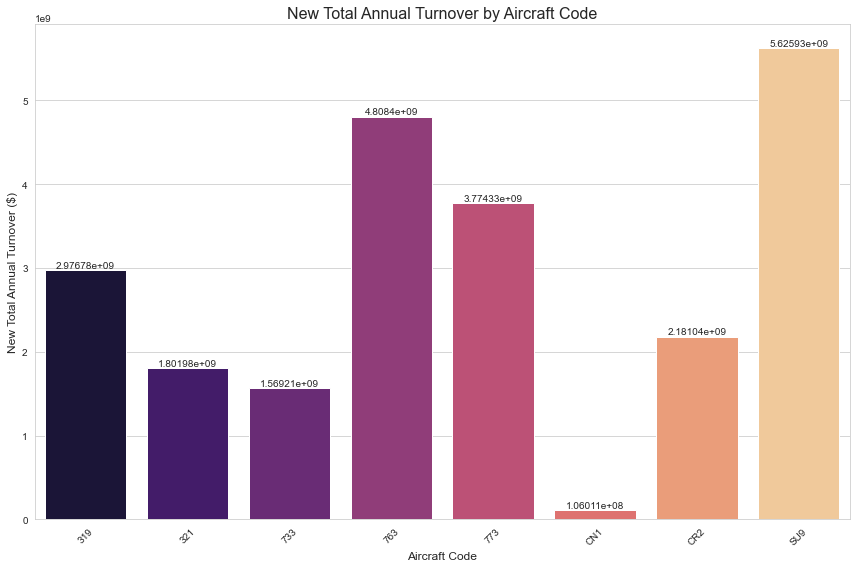

In [27]:
plt.figure(figsize=(12, 8))
ax2=sns.barplot(x='aircraft_code', y='New Total Annual Turnover', data=merged_data, palette='magma')
for container in ax2.containers:
    ax2.bar_label(container)
# Adding title and labels for clarity
plt.title('New Total Annual Turnover by Aircraft Code', fontsize=16)
plt.xlabel('Aircraft Code', fontsize=12)
plt.ylabel('New Total Annual Turnover ($)', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
# Show the plot
plt.tight_layout()
plt.show()

# Conclusion

In conclusion, airlines can enhance profitability by analyzing revenue data and making strategic decisions based on insights. Key metrics such as total revenue, average revenue per ticket, and average occupancy per aircraft are essential in this analysis. By identifying opportunities for improvement, refining pricing strategies, and optimizing routes, airlines can boost profitability. However, it is crucial for airlines to prioritize customer satisfaction and safety alongside profit goals. Striking the right balance between these factors is vital for long-term success in the competitive airline industry. Embracing a data-driven approach to revenue analysis and optimization can foster sustainable growth and long-term success.